In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Multi Armed Bandit Problem

<img src="epsilongreedy.png">

In [2]:
class bandit_urn:
    #Inicialization
    # levers: integer, number of levers
    # real_distribution: list, a list containing the ground truth probability of recieving a reward respectively, in this case of observing a crime
    # observed: list, a list containing the observed probability of recieving a reward respectively 
    # observed_size: list, a list of many times has each lever been pulled respectively
    # epsilon: float, a number between 0 and 1.
    # urn_balls: list of balls asociated to each neighborhood
    # lambdas: list of likelihood of a crime happening (probability or )
    # tot_reward: int, historic reward
    def __init__(self, real_distribution, epsilon, urn_balls, tot_reward=0):
        self.real_distribution=real_distribution
        self.epsilon=epsilon
        self.urn_balls=urn_balls
        self.tot_reward=tot_reward
    
    def total_balls(self):
        return(sum(self.urn_balls))
    
    # Calculate ratios of balls
    def ball_rates(self):
        rates=[i/self.total_balls() for i in self.urn_balls]
        return(rates)
    
    # Choose the neighborhood
    def choose_greedy(self):
        index=np.random.choice(len(self.urn_balls), p=self.ball_rates())
        return(index)
    
    def observe_reward(self,num_lever):
        reward=self.real_distribution[num_lever]
        return(reward)
 
    # Choose between exploration or explotation depending of epsilon probability
    def explore_or_exploit(self):
        explore=np.random.uniform(0,1)<self.epsilon
        return(explore)
    
    def filter(self, num_lever):
        filters=[(self.epsilon/2+(1-self.epsilon)*self.ball_rates()[i]) for i in range(len(self.urn_balls)) if i!=num_lever]
        filters=np.prod(filters)
        return(filters)
        
    # The corresponding entry of the observed and observed_size lists are updated
    def update_observed(self, num_lever, reward, explore):        
        if explore:
            self.urn_balls[num_lever]=(self.urn_balls[num_lever]+reward)        
        else:
            if np.random.uniform(0,1)<self.filter(num_lever):
                self.urn_balls[num_lever]=(self.urn_balls[num_lever]+reward)            
        self.tot_reward+=reward
        
    # Epsilon Greedy model
    def choose_e_greedy(self):
        action=self.explore_or_exploit()
        if action:
            which=random.randint(0,(len(self.urn_balls)-1))
            reward=self.observe_reward(which)
            #self.tot_reward=self.tot_reward+reward
            self.update_observed(which, reward, action)
        else:
            which=self.choose_greedy()
            reward=self.observe_reward(which)
            #self.tot_reward=self.tot_reward+reward
            self.update_observed(which, reward, action)
    
    # Simulate N periods of Epsilon-greedy algorithm
    def N_times_e_greedy(self, periods):
        observed_history=[]
        rewards=[]
        observed_history.append(self.ball_rates())
        rewards.append(self.tot_reward)
        for i in range(periods):
            self.choose_e_greedy()
            observed_history.append(self.ball_rates())
            rewards.append(self.tot_reward)
        return observed_history, rewards

#### Parameters

In [3]:
num_levers=3 # number of levers.
real=[3, 2, 4] # real distribution of rewards.
obs=[100, 100, 100] # observed distribution of rewards.
eps=0.05 # Probability (trade-off) of exploring instead of exploiting.
tot=0 # Starting reward.
N=1000 # periods of simulation.
k=100 # number of simulations

In [4]:
prueba=bandit_urn(real_distribution=real, urn_balls=obs, epsilon=eps)

In [5]:
%%time
history_rates, rewards2=prueba.N_times_e_greedy(N)

Wall time: 64.8 ms


In [6]:
dist_real=[i/sum(prueba.real_distribution) for i in prueba.real_distribution]

In [8]:
history_rates[0]

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [9]:
sum(rewards2)

1543775

In [121]:
red=[i[0] for i in history]
blue=[i[1] for i in history]
green=[i[2] for i in history]

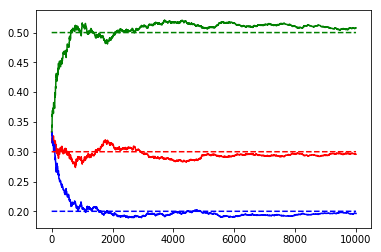

In [84]:
plt.plot(red, color='red')
plt.plot(blue, color='blue')
plt.plot(green, color='green')

plt.plot(range(len(red)), [dist_real[0]]*len(red), color='red', linestyle='--')
plt.plot(range(len(red)), [dist_real[1]]*len(red), color='blue', linestyle='--');
plt.plot(range(len(red)), [dist_real[2]]*len(red), color='green', linestyle='--')

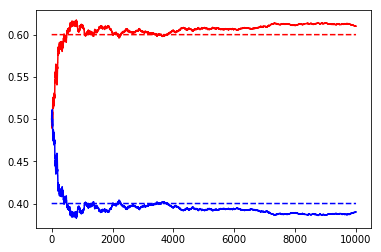

In [69]:
plt.plot(red, color='red')
plt.plot(blue, color='blue')
#plt.plot(green, color='green')

plt.plot(range(len(red)), [dist_real[0]]*len(red), color='red', linestyle='--')
plt.plot(range(len(red)), [dist_real[1]]*len(red), color='blue', linestyle='--');
#plt.plot(range(len(red)), [dist_real[2]]*len(red), color='green', linestyle='--')

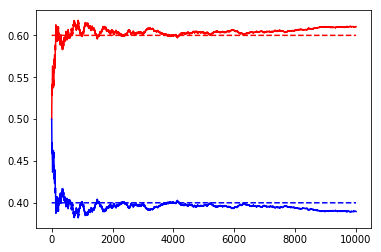

In [62]:
plt.plot(red, color='red')
plt.plot(blue, color='blue')
#plt.plot(green, color='green')

plt.plot(range(len(red)), [dist_real[0]]*len(red), color='red', linestyle='--')
plt.plot(range(len(red)), [dist_real[1]]*len(red), color='blue', linestyle='--');
#plt.plot(range(len(red)), [dist_real[2]]*len(red), color='green', linestyle='--')